# Hat-P-3 Model

In [1]:
import phoebe
from phoebe import u,c
logger = phoebe.logger(clevel='WARNING')
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import emcee
import corner
from timeit import default_timer as timer
import pickle
import sys
%matplotlib inline

## Total Binary

In [2]:
b = phoebe.default_binary()

In [3]:
b.add_dataset('lc',times=phoebe.linspace(0,3,200),dataset='lc01',overwrite=True)

<ParameterSet: 19 parameters | contexts: constraint, compute, dataset>

In [4]:
b.add_dataset('rv',times=phoebe.linspace(0,3,200),dataset='rv01',overwrite=True)

<ParameterSet: 18 parameters | contexts: constraint, compute, dataset>

## Primary

In [5]:
b.set_value(qualifier='requiv',component='primary',context='component',value=.772,unit='solRad')

In [6]:
b.flip_constraint(qualifier='mass',component='primary',context='component',solve_for='q')

<ConstraintParameter: {q@binary@component} = {mass@secondary@component} / {mass@primary@component} (solar units) => 1.0>

In [7]:
b.set_value(qualifier='mass',component='primary',context='component',value=0.907,unit='solMass')

In [8]:
b.get_parameter(qualifier='teff',component='primary',context='component').set_value(5182,unit='K')

## Secondary
Set distortion method to none to remove mesh from secondary

In [9]:
b.get_parameter(qualifier='requiv',component='secondary',context='component').set_value(.825,unit='jupiterRad')

In [10]:
b.flip_constraint(qualifier='mass',component='secondary',context='component',solve_for='sma')

<ConstraintParameter: {sma@binary@component} = (((({mass@secondary@component} * ({period@binary@component} ** 2.000000)) * (1.000000 + (1.000000 / {q@binary@component}))) * 2942.206217504418873431859537959099) / 39.478418) ** (1./3) (solar units) => 5.299999999999571 solRad>

In [11]:
b.get_parameter(qualifier='mass',component='secondary',context='component').set_value(0.591, unit='M_jup')

In [12]:
b.get_parameter(qualifier='distortion_method',component='secondary').set_value('sphere')

In [13]:
b.get_parameter(qualifier='teff',component='secondary').set_value(500,unit='K')

In [14]:
b.get_parameter(qualifier='atm',component='secondary').set_value('blackbody')

Fri, 12 Jul 2019 16:23 PARAMETERS   WARNING ld_mode='interp' not supported by atm='blackbody'.  Either change atm@secondary@phoebe01 or ld_mode@secondary@lc01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.


In [15]:
b.filter(qualifier='ld_mode',component='secondary').set_value_all('manual')

Fri, 12 Jul 2019 16:23 PARAMETERS   WARNING ld_mode='interp' not supported by atm='blackbody'.  Either change atm@secondary@phoebe01 or ld_mode@secondary@rv01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.


In [16]:
b.get_parameter(qualifier='period',component='binary',context='component').set_value(2.899703 ,unit='d')

In [17]:
b.get_parameter(qualifier='ecc',component='binary',context='component').set_value(0)

In [18]:
b.run_compute()

<ParameterSet: 6 parameters | kinds: rv, lc>

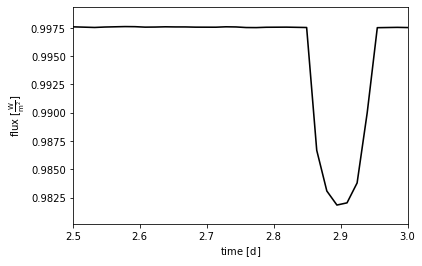

(<autofig.figure.Figure | 1 axes | 1 call(s)>,
 <Figure size 432x288 with 1 Axes>)

In [19]:
b.plot(dataset='lc01',xlim=(2.5,3.0))
b.show()

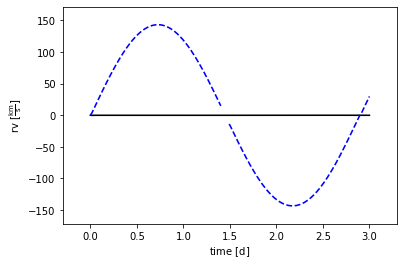

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 432x288 with 1 Axes>)

In [20]:
b.plot(dataset='rv01')
b.show()